In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

N = 3000 # Cantidad de simulaciones

no_change = 0 # Cantidad de veces que me llevo el auto sin cambiar de puerta
change = 0 # Cantidad de veces que me llevo el auto cambiando de puerta
rand_sel = 0 # Cantidad de veces que me llevo el auto eligiendo al azar entre las dos puertas restantes

Numero_de_tiradas = 0

a = int(N/3)
b = int(a * 2)

# Hits acumulados
change_acum = [] 
no_change_acum = []
rand_sel_acum = []

for i in range(N):

    Numero_de_tiradas = Numero_de_tiradas + 1

    R=np.array(random.sample(range(0, 3), 3) ) #0 es el auto
    Cambio = bool(random.getrandbits(1))
    Puerta = random.randrange(0,3)
    Premio =int(np.where(R == 0)[0])
    Puerta_Abierta = np.where((R != R[Puerta]) & (R != R[Premio]))[0]
    Otra_Puerta = R[(R != Puerta) & (R != Puerta_Abierta[0])]

    if i >= b:
        if Cambio == True: Puerta = Otra_Puerta[0]   
    elif i >= a:
        Cambio = False
    elif i >= 0:
        Cambio = True

    if Cambio == True: Puerta = Otra_Puerta[0]   

### para mi es aca donde pasa algo que no estoy entendeido bien que es ###

    if int(Premio) == int(Puerta): 
        if i >= b:
            rand_sel += 1
            #rand_sel_acum.append(rand_sel)
        elif i >= a:
            no_change += 1
            #no_change_acum.append(no_change)
        elif i >= 0:
            change += 1
            #change_acum.append(change)

    no_change_acum.append(no_change)
    change_acum.append(change)
    rand_sel_acum.append(rand_sel)

no_change, change, rand_sel, Numero_de_tiradas

(329, 659, 494, 3000)

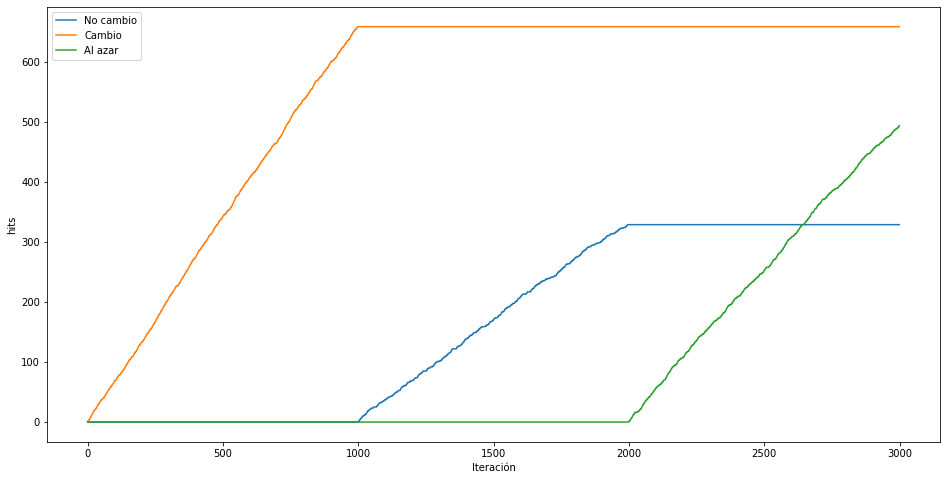

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(no_change_acum, label='No cambio')
plt.plot(change_acum, label='Cambio')
plt.plot(rand_sel_acum, label='Al azar')
plt.xlabel('Iteración')
plt.ylabel('hits')
plt.legend()
plt.show()

In [ ]:
print(no_change_acum)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(change_acum)

[1, 1, 2, 2, 3, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 19, 20, 21, 21, 21, 22, 23, 23, 24, 25, 26, 27, 28, 29, 29, 30, 30, 30, 31, 32, 33, 34, 35, 35, 36, 36, 37, 37, 38, 39, 39, 39, 39, 39, 40, 40, 41, 42, 43, 44, 45, 45, 46, 46, 47, 48, 49, 50, 50, 51, 52, 53, 53, 53, 54, 55, 56, 56, 57, 58, 58, 59, 59, 60, 61, 62, 62, 62, 63, 64, 65, 65, 66, 67, 68, 69, 69, 69, 70, 70, 70, 71, 72, 73, 74, 75, 75, 75, 76, 77, 78, 78, 78, 78, 79, 79, 80, 80, 81, 82, 83, 84, 84, 84, 85, 86, 86, 87, 88, 88, 88, 89, 90, 91, 92, 93, 94, 94, 95, 95, 96, 97, 98, 98, 99, 100, 101, 102, 103, 103, 104, 104, 104, 104, 105, 106, 107, 108, 108, 109, 109, 109, 109, 110, 111, 112, 113, 114, 115, 115, 116, 116, 117, 117, 118, 119, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 128, 128, 128, 129, 130, 131, 132, 133, 133, 133, 133, 133, 134, 135, 136, 137, 137, 137, 138, 139, 140, 141, 142, 142, 143, 144, 145, 146, 147, 147, 147, 148, 149, 149, 149, 150, 151, 152, 153, 154, 154, 15

In [ ]:
print(rand_sel_acum)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 